In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [4]:
data = np.loadtxt('ex2/ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

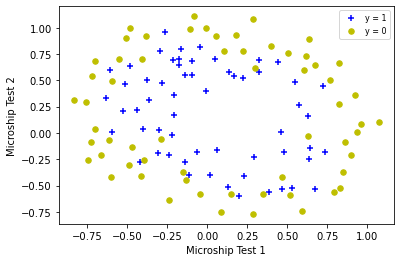

In [6]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    p1 = plt.scatter(X[pos, 0], X[pos, 1], marker='+', s=30, color='b')
    p2 = plt.scatter(X[neg, 0], X[neg, 1], marker='o', s=30, color='y')
    plt.legend((p1, p2), ('y = 1', 'y = 0'), loc='upper right', fontsize=8)
    plt.xlabel('Microship Test 1')
    plt.ylabel('Microship Test 2')
    plt.show
plotData(X, y)

# =========== Part 1: Regularized Logistic Regression ============

In [7]:
def mapFeature(x1, x2):
    degree = 6
    col = int(degree*(degree+1)/2+degree+1)
    out = np.ones((np.size(x1, 0), col))
    count = 1
    for i in range(1, degree+1):
        for j in range(i+1):
            out[:, count] = np.power(x1, i-j)*np.power(x2, j)
            count += 1
    return out

X = mapFeature(X[:, 0], X[:, 1])

In [17]:
# initialize fitting parameters
initial_theta = np.zeros((np.size(X, 1)))

# set regularization parameter lambda to 1
lamb = 1

In [50]:
# sigmoid function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g
# compute and display initial cost and gradient for regularized logistic regression
def costFunctionReg(initial_theta, X, y, lamb):
    m = np.size(y)
    h = sigmoid(X.dot(initial_theta))
    j = ((-y.dot(np.log(h)) - (1-y).dot(np.log(1 - h))) / m + lamb / (2 * m) * initial_theta[1:].dot(initial_theta[1:]))
    return j
def gradFunctionReg(initial_theta, X, y, lamb):
    m = np.size(y)
    h = sigmoid(X.dot(initial_theta))
    grad = np.zeros(np.size(initial_theta, 0))
    grad[0] = 1/m*(X[:, 0].dot(h-y))
    grad[1:] = 1 / m * (X[:, 1:].T.dot(h-y) + lamb * initial_theta[1:])
    return grad

In [51]:
cost = costFunctionReg(initial_theta, X, y, lamb)
grad = gradFunctionReg(initial_theta, X, y, lamb)

print('Cost at initial theta(zeros): %f' % cost)
print('Expected cost: 0.693')
print('Grdient first five values:', grad[:6])
print('Expected gradients: 0.0085 0.0188 0.0001 0.0503 0.0115')

Cost at initial theta(zeros): 0.693147
Expected cost: 0.693
Grdient first five values: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02]
Expected gradients: 0.0085 0.0188 0.0001 0.0503 0.0115


# ============= Part 2: Regularization and Accuracies =============

<ipython-input-61-10a966783e35>:19: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(um, vm, z, levels=[0], lw=2)


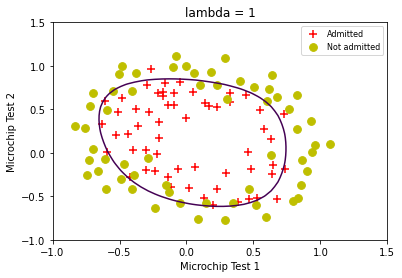

Train Accuracy:  0.8305084745762712


In [61]:
initial_theta = np.zeros((np.size(X, 1),))
lamd = 1
result = op.minimize(costFunctionReg, x0=init_theta, method='BFGS', jac=gradFunctionReg, args=(X, y, lamd))
theta = result.x

def plotDecisionBoundary(theta, x, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    p1 = plt.scatter(x[pos, 1], x[pos, 2], marker='+', s=60, color='r')
    p2 = plt.scatter(x[neg, 1], x[neg, 2], marker='o', s=60, color='y')
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((np.size(u, 0), np.size(v, 0)))
    for i in range(np.size(u, 0)):
        for j in range(np.size(v, 0)):
            z[i, j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(theta)
    z = z.T
    [um, vm] = np.meshgrid(u, v)
    plt.contour(um, vm, z, levels=[0], linewidths=2)
    plt.legend((p1, p2), ('Admitted', 'Not admitted'), loc='upper right', fontsize=8)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.title('lambda = 1')
    plt.show()

plotDecisionBoundary(theta, X, y)

# 预测给定值
def predict(theta, x):
    m = np.size(X, 0)
    p = np.zeros((m,))
    pos = np.where(x.dot(theta) >= 0)
    neg = np.where(x.dot(theta) < 0)
    p[pos] = 1
    p[neg] = 0
    return p

p = predict(theta, X)
print('Train Accuracy: ', np.sum(p == y)/np.size(y, 0))